# P2_1_Exploratory_Data_Analysis
## Lerys Granado - 20/07/2021

In [1]:
#-*-coding:utf-8 -*

from urllib.request import urlretrieve
from zipfile import ZipFile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from cycler import cycler

In [2]:
# Graphical parameters #

sns.set()
sns.set_style("ticks")
ColorsPalette = sns.color_palette("tab10")

%matplotlib inline                                 
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
                                  
pd.set_option('display.max_row', 50)
pd.set_option('display.max_column', 10)    

# Importation des data

In [3]:
# Retrieve data from web (uncomment if needed) #

# urlretrieve('https://s3-eu-west-1.amazonaws.com/static.oc-static.com\
# /prod/courses/files/Parcours_data_scientist/Projet+-+Donn%C3%A9es+%C3%A9ducatives\
# /Projet+Python_Dataset_Edstats_csv.zip','Projet+Python_Dataset_Edstats_csv.zip')

# Unzip file in current folder (uncomment if needed) #

# unZip = ZipFile('Projet+Python_Dataset_Edstats_csv.zip', 'r')
# unZip.extractall()

# import raw data in DataFrame from csv #

In [4]:
data = pd.read_csv('EdStatsData.csv')
df = data.copy()

# 1. Analyse de forme
## 1.1 Description des données

In [5]:
print('Data shape : \n', df.shape)
print( '\n','Data dtype counts : \n', df.dtypes.value_counts())
df.head()

Data shape : 
 (886930, 70)

 Data dtype counts : 
 float64    66
object      4
dtype: int64


Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970  ...  2085  2090  2095  2100  Unnamed: 69  
0        NaN  ...   NaN   NaN   NaN   NaN          NaN  
1        NaN  ...   NaN   NaN   NaN   NaN          NaN  
2        NaN  ...   NaN   NaN   NaN   NaN          NaN  
3        NaN  ...   NaN   NaN   NaN   NaN          NaN  
4  54.822121  ...   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

## 1.2. Analyse des valeurs manquantes (NaN)

### 1.2.1. Analyse des NaN par colonne

NaN count over columns (normalized) : 

count    70.000000
mean      0.860999
std       0.219898
min       0.000000
25%       0.856007
50%       0.942007
75%       0.956112
max       1.000000
dtype: float64


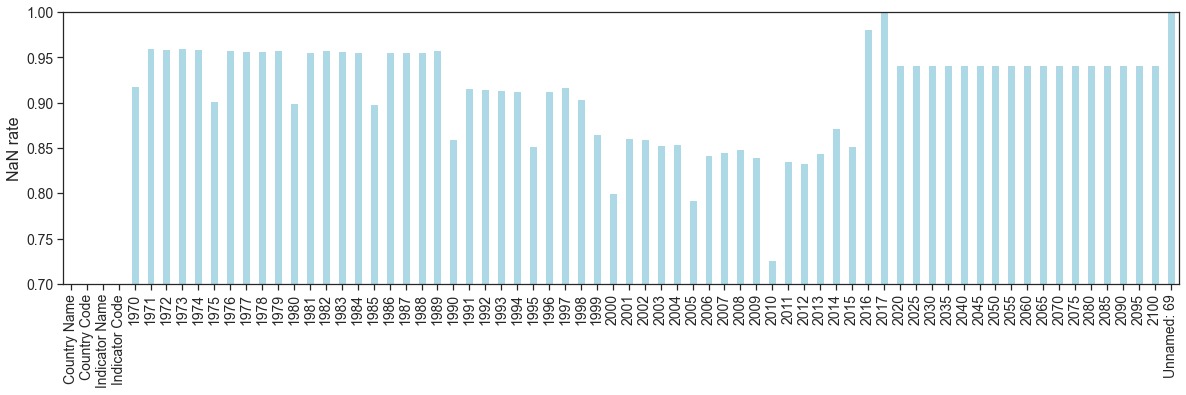

In [6]:
# NaN visualization over the whole dataset 

# plt.figure(figsize = (30,10))
# sns.heatmap(df.isna(), cmap =  'Blues_r')

# NaN count over columns (normalized)

print('NaN count over columns (normalized) : \n')

NaN_col = df.isna().sum()/df.shape[0]
print(NaN_col.describe())

# NaN count visualization

col = (df.columns).astype('str')

NaN_col.plot(kind='bar', x = col, y = NaN_col, color= 'lightblue', figsize = (20,5)).set_ylim([0.7,1])
plt.ylabel('NaN rate', fontsize = 16)


# Drop all columns except target and 2000-2015 

df = df.drop(df.loc[:, '1970':'1989'], axis = 1)
df = df.drop(df.loc[:, '2016':], axis = 1)

<AxesSubplot:>

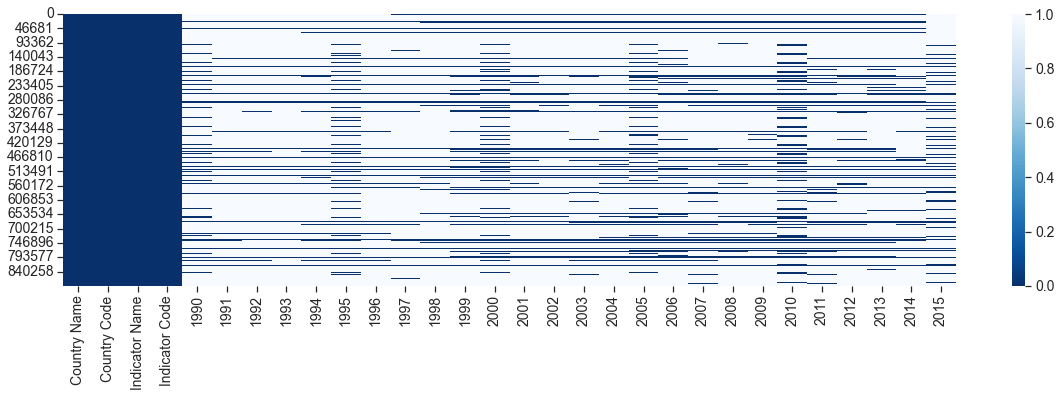

In [7]:
# Visualization of NaN in reduced dataset

# sns.color_palette("Blues", as_cmap=True)
plt.figure(figsize = (20,5))
sns.heatmap(df.isna(), cmap =  'Blues_r')

### 1.2.2. Analyse des NaN par target 'Indicator' 
Le but ici est de faire un classement des 'indicator' par leur taux de remplissage, <br>
afin de sélectionner des variables pertinentes et bien renseignées.

count    3665.000000
mean        0.858941
std         0.222065
min         0.014145
25%         0.857120
50%         0.952003
75%         0.995391
max         1.000000
Name: NaN rate, dtype: float64
select file name: export


Topic  \
Indicator Code                                                         
SP.POP.TOTL                            Health: Population: Structure   
SP.POP.GROW                             Health: Population: Dynamics   
NY.GDP.MKTP.CD     Economic Policy & Debt: National accounts: US$...   
NY.GDP.PCAP.CD     Economic Policy & Debt: National accounts: US$...   
SP.POP.1564.TO.ZS                      Health: Population: Structure   

                                       Indicator Name  \
Indicator Code                                          
SP.POP.TOTL                         Population, total   
SP.POP.GROW              Population growth (annual %)   
NY.GDP.MKTP.CD                      GDP (current US$)   
NY.GDP.PCAP.CD           GDP per capita (current US$)   
SP.POP.1564.TO.ZS  Population ages 15-64 (% of total)   

                                                    Short definition  \
Indicator Code                                                         
SP.POP.TOTL                                                      NaN   
SP.POP.GROW        Annual population growth rate. Population is b...   
NY.GDP.MKTP.CD                                                   NaN   
NY.GDP.PCAP.CD                                                   NaN   
SP.POP.1564.TO.ZS                                                NaN   

                                                     Long Definition  NaN rate  
Indicator Code                                                                  
SP.POP.TOTL        Total population is based on the de facto defi...  0.014145  
SP.POP.GROW        Annual population growth rate for year t is th...  0.015099  
NY.GDP.MKTP.CD     GDP at purchaser's prices is the sum of gross ...  0.088525  
NY.GDP.PCAP.CD     GDP per capita is gross domestic product divid...  0.089002  
SP.POP.1564.TO.ZS  Total population between the ages 15 to 64 as ...  0.095677

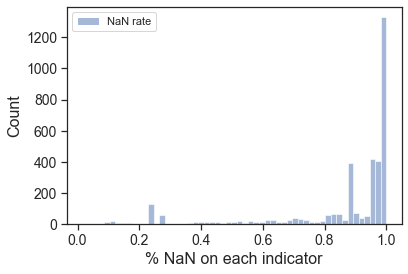

In [9]:
# aggregation of data by Indicator Code #

# create a boolean mask with NaN : true or false
mask = (df.loc[:, '1990':]).isna()
mask = mask.astype(int)

mask['Indicator Code'] = df['Indicator Code']

# Aggegation on Indicator Code

mask = mask.groupby('Indicator Code').sum()

# Calculate NaN rate per Indicator Code in a new column

mask['NaN rate'] = (mask.sum(axis = 1)/ mask.sum(axis = 1).max())

print(mask['NaN rate'].describe())

# Drop unnecessary columns

mask.drop(mask.loc[:,'1990':'2015'], axis=1, inplace=True)

# We want to add a column containing Indicator Name to better select valuable variable #
# We will merge the previous DataFrame with EdStatsSeries.csv to have a full description of parameters #

# import data EdStatsSeries.csv

Series0 = pd.read_csv('EdStatsSeries.csv')

# pick relevant columnscs

Series1 = Series0.iloc[:,0:5]

# Discrepencies found in column name, fix :

Series1.columns = ['Indicator Code', 'Topic', 'Indicator Name', 'Short definition', 'Long Definition']
Series1 = Series1.set_index('Indicator Code')

# Merge Series1 and indicCode_sum DataFrame

IndicCod = pd.merge(Series1, mask,  left_index=True, right_index=True)

# sort DataFrame by decreasing entry values by 'Indicator Code'

IndicCod = IndicCod.sort_values(by='NaN rate', ascending=True)

# Export Relevant Parameters (uncomment if necessary)

input_ = input('select file name: ')
IndicCod.to_excel('{}.xlsx'.format(input_))

sns.histplot(mask)
plt.xlabel ('% NaN on each indicator', fontsize=16)
plt.ylabel('Count', fontsize=16)

IndicCod.head(5)


# 2. Réduction des données 

## 2.1. Selection de paramètres pertinents

### 2.1.1. Création d'un subdata set : df_indicCod (ne retenant que qqs indicateurs pertinents)

In [10]:
# Select data with relevant parameters #

IndicCode = ['NY.GDP.PCAP.CD',
'SP.SEC.TOTL.IN',
'SP.PRM.TOTL.IN',
'SP.TER.TOTL.IN',
'IT.NET.USER.P2',
'SE.SEC.ENRR',
'SE.TER.ENRR',
]

df_indicCod = df[df['Indicator Code'].isin(IndicCode)]
df_indicCod.shape

(1694, 30)

### 2.1.2. Analyses des NaN par lignes

<AxesSubplot:>

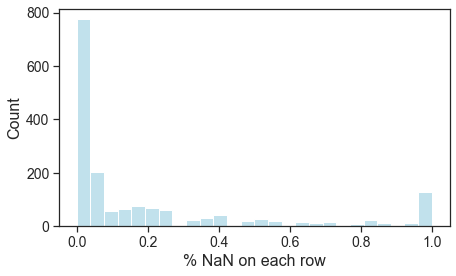

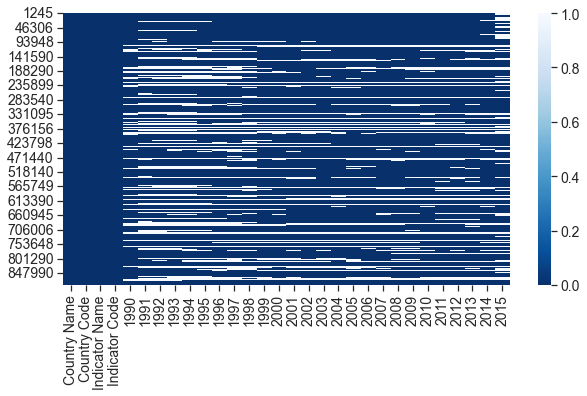

In [11]:
mask2 = (df_indicCod.loc[:, '1990':]).isna()
mask2 = mask2.astype(int)

NaN_row = (mask2.sum(axis=1)/mask2.sum(axis=1).max())

plt.figure(figsize=(7,4))
sns.histplot(NaN_row, stat='count', color ='lightblue')
plt.xlabel ('% NaN on each row', fontsize=16)
plt.ylabel('Count', fontsize=16)

plt.figure(figsize = (10,5))
sns.heatmap(df_indicCod.isna(), cmap = 'Blues_r' )

## 2.2. Agrégation des données par la moyenne (2006-2015)


In [12]:
annee1 = '2006' 
annee2 = '2015'

df_indicCod['mean'] = (df_indicCod.loc[:,annee1:annee2]).mean(axis=1)

df_indicCod['mean'].isna().sum()

C:\Users\Lerys\AppData\Local\Temp/ipykernel_1980/1447460188.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indicCod['mean'] = (df_indicCod.loc[:,annee1:annee2]).mean(axis=1)


163

## 2.3. Création d'un subdataset : df_avg2 <br> (ne retenant que la moyenne des valeurs / pays / indicateur)


In [13]:
# Subset creation : Index = Country Code, Columns = Indicator Code, Values = mean (année1:année2) #

df_avg =(df_indicCod.groupby([ 'Indicator Code', 'Country Code'])).mean()

df_avg2 = pd.DataFrame(columns=IndicCode)

for i in range(len(IndicCode)):
    this_column = df_avg2.columns[i]
    df_avg2[this_column] =  df_avg.loc[(IndicCode[i]), 'mean']

### 2.3.1. Matrice de correlation

<AxesSubplot:>

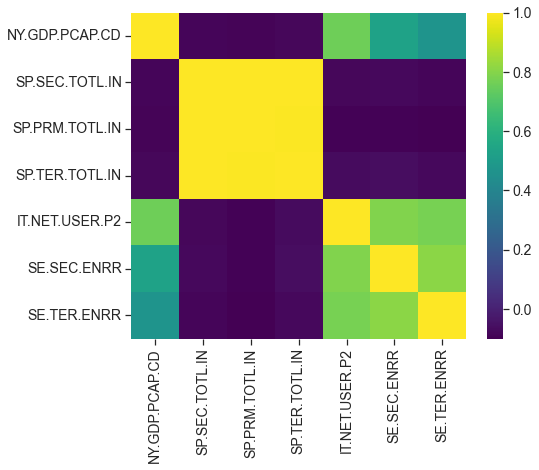

In [14]:
plt.figure(figsize=(7.5,6))
sns.heatmap(df_avg2.corr(),  cmap = 'viridis')

### 2.3.2. Aggrégation des paramètres de population (PRM+SEC+TER) et enrollment (mean : SEC,TER)

In [15]:
df_avg2['POP.PRM+SEC+TER'] = df_avg2.loc[:, 'SP.SEC.TOTL.IN':'SP.TER.TOTL.IN'].sum(axis=1)
df_avg2['SE.ENRR.SEC.TER'] = df_avg2.loc[:, 'SE.SEC.ENRR':'SE.TER.ENRR'].mean(axis=1)

df_avg2.drop([ 'SP.SEC.TOTL.IN', 'SP.PRM.TOTL.IN', 'SP.TER.TOTL.IN', 'SE.SEC.ENRR', 'SE.TER.ENRR'], inplace = True, axis = 1)

In [16]:
df_avg2

NY.GDP.PCAP.CD  IT.NET.USER.P2  POP.PRM+SEC+TER  SE.ENRR.SEC.TER
Country Code                                                                  
ABW             25285.160892       62.524123     2.304980e+04        64.521372
AFG               510.089220        4.501167     1.171191e+07        26.695329
AGO              3779.371504        5.130000     8.868523e+06        16.887066
ALB              4079.849781       41.891500     8.951368e+05        67.360667
AND             42163.579507       80.362127     0.000000e+00              NaN
...                      ...             ...              ...              ...
XKX              3371.290991             NaN     0.000000e+00              NaN
YEM              1290.353563       13.444473     9.969097e+06        27.761714
ZAF              6556.720439       28.049163     1.779064e+07        55.575360
ZMB              1438.845573       11.125811     5.714919e+06         3.993995
ZWE               738.174728        9.430756     6.184281e+06        26.751148

[242 rows x 4 columns]

<AxesSubplot:>

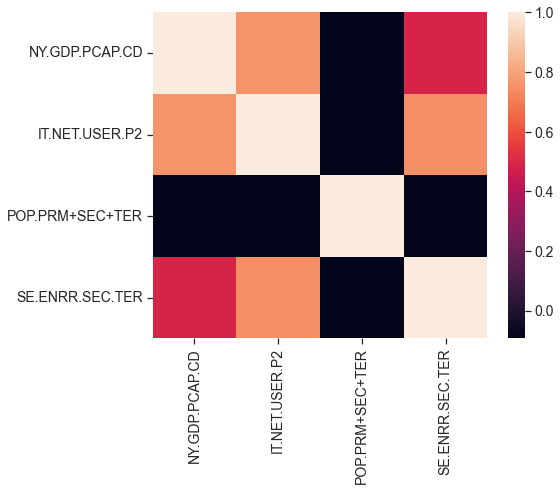

In [17]:
plt.figure(figsize=(7.5,6))
sns.heatmap(df_avg2.corr())

In [18]:
df_avg2.shape

(242, 4)

### 2.3.2. Nettoyage des NaN restants (élimination de pays dont indicateurs sont NaN)

In [19]:
len(df_avg2.columns)

4

Country Code
TCA    0.75
SXM    0.75
MAF    0.75
VGB    0.50
CHI    0.50
NCL    0.50
IMN    0.50
CUW    0.50
NRU    0.50
MNP    0.50
ASM    0.50
XKX    0.50
GIB    0.50
PYF    0.50
GNQ    0.25
GRL    0.25
SGP    0.25
TTO    0.25
SSD    0.25
CYM    0.25
PLW    0.25
HTI    0.25
PRK    0.25
GAB    0.25
FRO    0.25
GUM    0.25
FSM    0.25
BIH    0.25
VIR    0.25
AND    0.25
ARE    0.25
MCO    0.25
MNE    0.00
MDG    0.00
NZL    0.00
OED    0.00
OMN    0.00
MDA    0.00
PAK    0.00
PAN    0.00
MAR    0.00
NOR    0.00
PER    0.00
PHL    0.00
MAC    0.00
PNG    0.00
POL    0.00
PRI    0.00
LVA    0.00
LUX    0.00
dtype: float64


NY.GDP.PCAP.CD  IT.NET.USER.P2  POP.PRM+SEC+TER  SE.ENRR.SEC.TER
Country Code                                                                  
ABW             25285.160892       62.524123     2.304980e+04        64.521372
AFG               510.089220        4.501167     1.171191e+07        26.695329
AGO              3779.371504        5.130000     8.868523e+06        16.887066
ALB              4079.849781       41.891500     8.951368e+05        67.360667
ARB              6163.758344       24.345701     1.221372e+08        46.498201
...                      ...             ...              ...              ...
WSM              3655.295851       11.308027     7.456340e+04        85.662508
YEM              1290.353563       13.444473     9.969097e+06        27.761714
ZAF              6556.720439       28.049163     1.779064e+07        55.575360
ZMB              1438.845573       11.125811     5.714919e+06         3.993995
ZWE               738.174728        9.430756     6.184281e+06        26.751148

[210 rows x 4 columns]

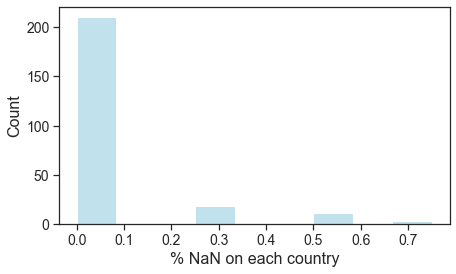

In [20]:
# NaN cleaning by country #

NaN_country = df_avg2.isna().sum(axis=1)/len(df_avg2.columns)

plt.figure(figsize=(7,4))
sns.histplot(NaN_country, stat='count', color ='lightblue')
plt.xlabel ('% NaN on each country', fontsize=16)
plt.ylabel('Count', fontsize=16)

print(NaN_country.sort_values(ascending=False).head(50))

df_avg2.dropna(axis=0, inplace=True)
df_avg2.shape
df_avg2


NY.GDP.PCAP.CD  IT.NET.USER.P2  POP.PRM+SEC+TER  SE.ENRR.SEC.TER
Country Code                                                                  
ABW             25285.160892       62.524123     2.304980e+04        64.521372
AFG               510.089220        4.501167     1.171191e+07        26.695329
AGO              3779.371504        5.130000     8.868523e+06        16.887066
ALB              4079.849781       41.891500     8.951368e+05        67.360667
ARB              6163.758344       24.345701     1.221372e+08        46.498201
...                      ...             ...              ...              ...
WSM              3655.295851       11.308027     7.456340e+04        85.662508
YEM              1290.353563       13.444473     9.969097e+06        27.761714
ZAF              6556.720439       28.049163     1.779064e+07        55.575360
ZMB              1438.845573       11.125811     5.714919e+06         3.993995
ZWE               738.174728        9.430756     6.184281e+06        26.751148

[210 rows x 4 columns]

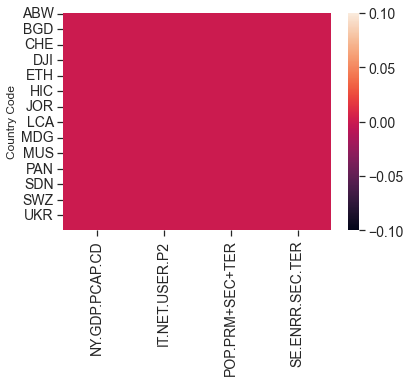

In [21]:
sns.heatmap(df_avg2.isna())

df_avg2.shape

df_avg2

# 3. Analyses des données et scoring

## 3.1. Analyse par zone géographique

### 3.1.1. Creation d'un subdataset: df_GeoZone

In [22]:
GeoCode = ['EAS', 'ECS', 'LCN', 'MEA', 'NAC', 'SAS', 'SSF']

df_GeoZone = df_avg2[(df_avg2.index.isin(GeoCode))]
df_GeoZone

NY.GDP.PCAP.CD  IT.NET.USER.P2  POP.PRM+SEC+TER  SE.ENRR.SEC.TER
Country Code                                                                  
EAS              7848.961390       34.563383     5.653971e+08        54.744892
ECS             24339.077390       56.453598     1.886989e+08        80.103293
LCN              8594.722357       36.854128     1.809771e+08        64.921408
MEA              7266.538431       27.098865     1.287268e+08        53.592923
NAC             50017.171994       73.255996     7.865412e+07        91.195106
SAS              1213.078054       10.064880     5.589934e+08        37.677062
SSF              1486.291771        8.574530     3.451657e+08        23.278103

### 3.1.2. Analyses de distribution (par zone géo)

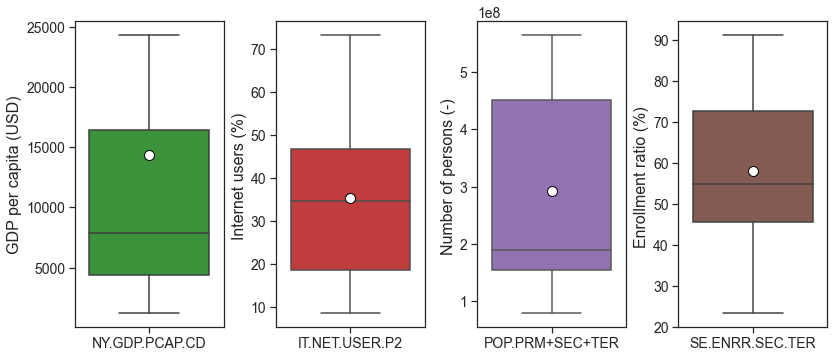

In [23]:
fig = plt.figure(figsize = (20, 5))

y_labls = ['GDP per capita (USD)', 'Internet users (%) ', 'Number of persons (-) ', 'Enrollment ratio (%) ']

for j in range(len(df_GeoZone.columns)):
    plt.subplot(1,len(IndicCode), j+1)
    ax = sns.boxplot(data = df_GeoZone.iloc[:,j], color = ColorsPalette[j+2],
                    showfliers = False, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
    ax.set(xticklabels=[df_GeoZone.columns[j]])
    ax.set_ylabel(y_labls[j], fontsize=16)
    
fig.tight_layout(pad=0.8)
    

### 3.1.3. Evolution des indicateurs sur 1990-2015 par zone géo <br> (imputation des NaN : interpolation linéaire)

C:\Users\Lerys\AppData\Local\Temp/ipykernel_1980/4078803515.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_GeoCode3 = df_GeoCode2.drop(df_GeoCode2.iloc[:,1:4], 1)
C:\Users\Lerys\AppData\Local\Temp/ipykernel_1980/4078803515.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_GeoCode3 = df_GeoCode2.drop(df_GeoCode2.iloc[:,1:4], 1)
C:\Users\Lerys\AppData\Local\Temp/ipykernel_1980/4078803515.py:42: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_GeoCode3 = df_GeoCode2.drop(df_GeoCode2.iloc[:,1:4], 1)
C:\Users\Lerys\AppData\Local\Temp/ipykernel_1980/4078803515.py:64: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_GeoCode3 = df_GeoCode

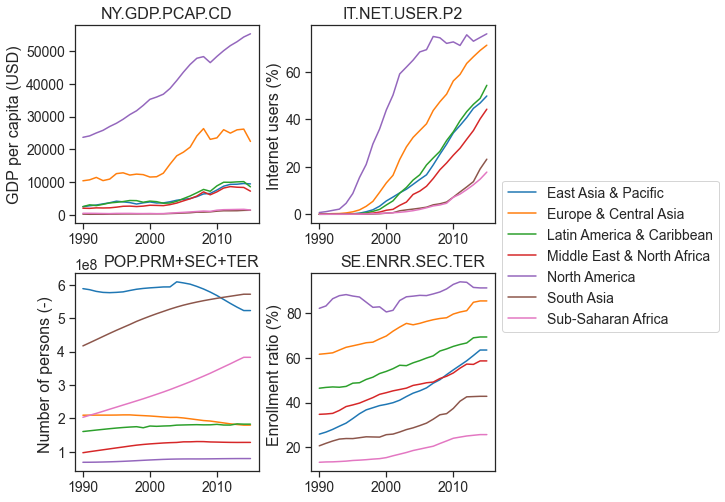

In [24]:
fig2 = plt.figure(figsize= (7,7))
x = np.linspace(1990, 2015, 26)

df_GeoCode  = df_indicCod[(df_indicCod['Country Code'].isin(GeoCode))]

y_labls = ['GDP per capita (USD)', 'Internet users (%) ', 'Number of persons (-) ', 'Enrollment ratio (%) ']

df_GeoCode2 = df_GeoCode[df_GeoCode['Indicator Code'] == 'NY.GDP.PCAP.CD']
df_GeoCode3 = df_GeoCode2.drop(df_GeoCode2.iloc[:,1:4], 1)
df_GeoCode3.set_index(['Country Name'], inplace=True)
df_GeoCode4 = df_GeoCode3.T
df_GeoCode4.drop(labels ='mean',  axis = 0, inplace = True)
df_GeoCode4 = df_GeoCode4.interpolate(method='linear', axis=0)
df_GeoCode4   

plt.rc('axes', prop_cycle=(cycler('color', ColorsPalette)))
plt.subplot(2,2, 1)
plt.plot(x, df_GeoCode4)    
plt.ylabel(y_labls[0], fontsize = 16)
plt.title('NY.GDP.PCAP.CD',  fontsize = 16 )

df_GeoCode2 = df_GeoCode[df_GeoCode['Indicator Code'] ==  'IT.NET.USER.P2']
df_GeoCode3 = df_GeoCode2.drop(df_GeoCode2.iloc[:,1:4], 1)
df_GeoCode3.set_index(['Country Name'], inplace=True)
df_GeoCode4 = df_GeoCode3.T
df_GeoCode4.drop(labels ='mean',  axis = 0, inplace = True)
df_GeoCode4 = df_GeoCode4.interpolate(method='linear', axis=0)
df_GeoCode4      
        
plt.rc('axes', prop_cycle=(cycler('color', ColorsPalette)))
plt.subplot(2,2, 2)
plt.plot(x, df_GeoCode4)    
plt.ylabel(y_labls[1], fontsize = 16)
plt.title('IT.NET.USER.P2',  fontsize = 16 )

buff = ['SP.SEC.TOTL.IN',
 'SP.PRM.TOTL.IN',
 'SP.TER.TOTL.IN']

for i in range(len(buff)):
    df_GeoCode2 = df_GeoCode[df_GeoCode['Indicator Code'] == (buff[i])]
    df_GeoCode3 = df_GeoCode2.drop(df_GeoCode2.iloc[:,1:4], 1)
    df_GeoCode3.set_index(['Country Name'], inplace=True)
    df_GeoCode4 = df_GeoCode3.T
    df_GeoCode4.drop(labels ='mean',  axis = 0, inplace = True)
    df_GeoCode4 = df_GeoCode4.interpolate(method='linear', axis=0)
    
    if i == 0:
        df_GeoCode5 = df_GeoCode4.copy()
    else:
        df_GeoCode5 += df_GeoCode4
    
plt.rc('axes', prop_cycle=(cycler('color', ColorsPalette)))
plt.subplot(2,2,3)
plt.plot(x, df_GeoCode5)    
plt.ylabel(y_labls[2], fontsize = 16)
plt.title('POP.PRM+SEC+TER',  x = .58, fontsize = 16) 

buff2 = ['SE.SEC.ENRR',
'SE.TER.ENRR']

for i in range(len(buff2)):
    df_GeoCode2 = df_GeoCode[df_GeoCode['Indicator Code'] == (buff2[i])]
    df_GeoCode3 = df_GeoCode2.drop(df_GeoCode2.iloc[:,1:4], 1)
    df_GeoCode3.set_index(['Country Name'], inplace=True)
    df_GeoCode4 = df_GeoCode3.T
    df_GeoCode4.drop(labels ='mean',  axis = 0, inplace = True)
    df_GeoCode4 = df_GeoCode4.interpolate(method='linear', axis=0)
    
    if i == 0:
        df_GeoCode5b = df_GeoCode4.copy()
    else:
        df_GeoCode5b += df_GeoCode4
        
df_GeoCode6 =  df_GeoCode5b/2    
          
plt.subplot(2,2, 4)
plt.plot(x, df_GeoCode6) 
plt.ylabel(y_labls[3], fontsize = 16)
plt.title('SE.ENRR.SEC.TER', x = .55, fontsize = 16)
    
fig2.tight_layout(pad=0.8)
plt.legend(df_GeoCode4.columns, bbox_to_anchor = (1, 1.5), fontsize = 14)
plt.show()

### 3.1.4. Scoring par zones géographiques

count    7.000000
mean     4.142857
std      0.690066
min      3.000000
25%      4.000000
50%      4.000000
75%      4.500000
max      5.000000
Name: TOTAL, dtype: float64


NY.GDP.PCAP.CD  IT.NET.USER.P2  POP.PRM+SEC+TER  \
Country Code                                                    
EAS                        4               4                9   
ECS                        8               8                4   
LCN                        6               6                3   
NAC                        9               9                0   
SAS                        0               1                8   
SSF                        1               0                6   
MEA                        3               3                1   

              SE.ENRR.SEC.TER  TOTAL  STD  
Country Code                               
EAS                         5      5    2  
ECS                         1      5    2  
LCN                         3      4    1  
NAC                         0      4    4  
SAS                         8      4    3  
SSF                         9      4    3  
MEA                         6      3    1

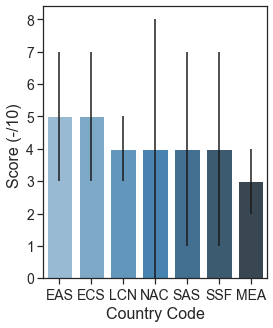

In [25]:
# =========================#
#   Scoring by Geographical Zone  #
# =========================#

df_GeoZone_Score = pd.DataFrame(index = df_GeoZone.index, columns=df_GeoZone.columns)

# Scoring using percentiles  

for j in range(len(df_GeoZone.columns)): 
    
    if df_GeoZone_Score.columns[j] == 'SE.ENRR.SEC.TER':
        
        df_GeoZone_Score.iloc[:,j] =  (9 - pd.qcut((df_GeoZone.iloc[:,j]), 10, labels = False, precision=4))
                                 
    else:       
        
        df_GeoZone_Score.iloc[:,j] =  pd.qcut((df_GeoZone.iloc[:,j ]), 10, labels = False, precision=4)
        
# Final score and std        

df_GeoZone_Score['TOTAL'] = df_GeoZone_Score.mean(axis=1)
df_GeoZone_Score['STD'] = df_GeoZone_Score.std(axis=1)

Output_GeoZone = df_GeoZone_Score.sort_values(by='TOTAL', ascending=False).dropna().astype('int')

# Plots and print outputs

fig = plt.figure(figsize = (4, 5))

ax = sns.barplot(data = Output_GeoZone, 
                 x = Output_GeoZone.index, 
                 y = Output_GeoZone['TOTAL'], 
                 yerr = Output_GeoZone['STD'], ci = None, capsize=20,  
                 palette='Blues_d')

ax.set_xlabel('Country Code', fontsize=16)
ax.set_ylabel('Score (-/10) ', fontsize=16)

print(Output_GeoZone['TOTAL'].describe())

Output_GeoZone

## 3.2. Analyse par pays

### 3.2.1. Nettoyage des données (subatased = df_country) : <br> drop les country code correspondant à des zone géographique

In [26]:
GeoZone = ['ARB',
'EAS',
'EAP',
'EMU',
'ECS',
'ECA',
'EUU',
'HPC',
'HIC',
'LCN',
'LAC',
'LDC',
'LMY',
'LIC',
'LMC',
'MEA',
'MNA',
'MIC',
'NAC',
'OED',
'SAS',
'SSF',
'SSA',
'UMC',
'WLD']

df_Country = df_avg2[~(df_avg2.index.isin(GeoZone))]

df_Country.shape

(185, 4)

### 3.2.2. Analyse de distribution (par pays)

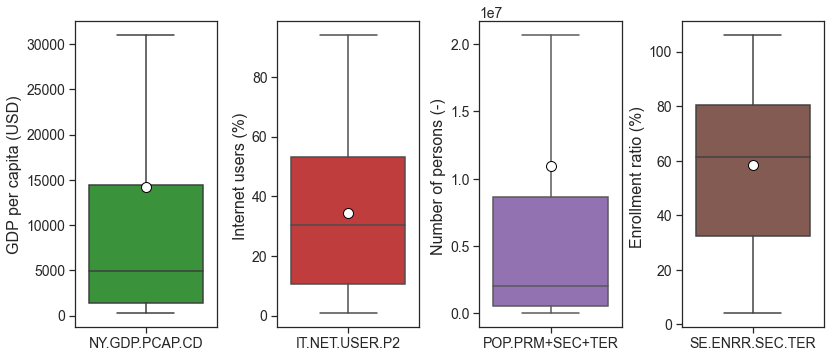

In [27]:
fig = plt.figure(figsize = (20, 5))

y_labls = ['GDP per capita (USD)', 'Internet users (%) ', 'Number of persons (-) ', 'Enrollment ratio (%) ']

for j in range(len(df_Country.columns)):
    plt.subplot(1,len(IndicCode), j+1)
    ax = sns.boxplot(data = df_Country.iloc[:,j], color = ColorsPalette[j+2],
                    showfliers = False, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
    ax.set(xticklabels=[df_GeoZone.columns[j]])
    ax.set_ylabel(y_labls[j], fontsize=16)
    
fig.tight_layout(pad=0.8)

### 3.2.3. Scoring par pays

count    185.000000
mean      49.113514
std       10.841400
min       17.000000
25%       42.000000
50%       49.000000
75%       56.000000
max       73.000000
Name: TOTAL, dtype: float64


NY.GDP.PCAP.CD  IT.NET.USER.P2  POP.PRM+SEC+TER  \
Country Code                                                    
GBR                       89              95               86   
JPN                       87              92               90   
USA                       92              88               98   
DEU                       88              92               87   
MYS                       65              79               78   
FRA                       88              89               84   
MEX                       65              55               95   
CHE                       97              94               41   
BRA                       66              64               96   
AZE                       54              66               54   
LUX                       99              97               11   
KOR                       80              95               81   
CHN                       52              54               99   
QAT                       97              82               20   
ITA                       86              72               80   
SAU                       78              68               76   
BMU                       98              96                1   
CAN                       90              93               71   
NLD                       93              97               58   
VNM                       26              51               92   
TUR                       68              61               91   
RUS                       69              69               93   
ZAF                       58              47               89   
SWE                       94              98               47   
AUS                       94              91               65   

              SE.ENRR.SEC.TER  TOTAL  STD  
Country Code                               
GBR                        24     73   28  
JPN                        25     73   28  
USA                        11     72   35  
DEU                        20     71   29  
MYS                        63     71    7  
FRA                        19     70   29  
MEX                        57     68   16  
CHE                        33     66   29  
BRA                        38     66   20  
AZE                        89     65   14  
LUX                        55     65   36  
KOR                         6     65   34  
CHN                        56     65   19  
QAT                        62     65   28  
ITA                        22     65   25  
SAU                        37     64   16  
BMU                        60     63   39  
CAN                         1     63   37  
NLD                         7     63   36  
VNM                        85     63   26  
TUR                        32     63   21  
RUS                        20     62   26  
ZAF                        57     62   15  
SWE                        12     62   35  
AUS                         0     62   37

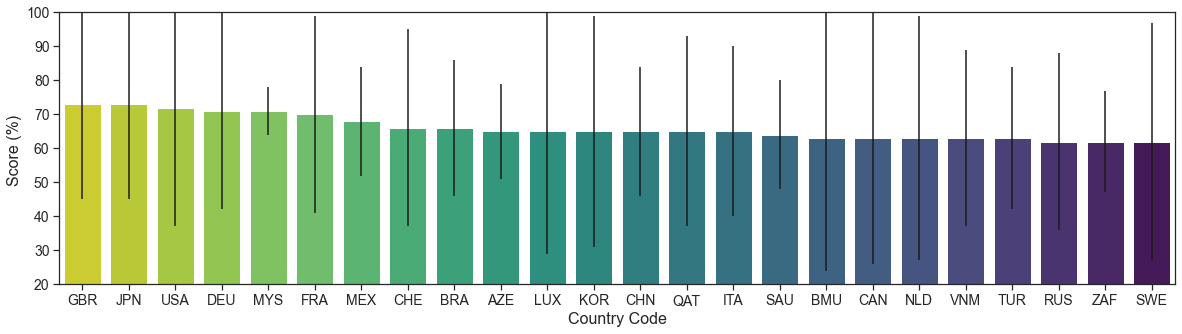

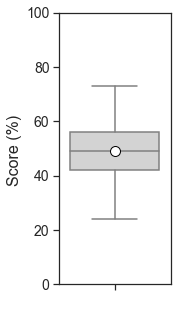

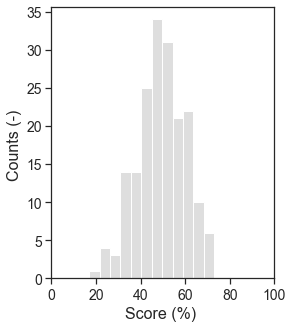

In [28]:
# =========================#
#            Scoring by Country           #
# =========================#

df_Country_Score = pd.DataFrame(index = df_Country.index, columns=df_Country.columns)

# Scoring using percentiles  

for j in range(len(df_Country.columns)): 
    
    if df_Country_Score.columns[j] == 'SE.ENRR.SEC.TER':
        
        df_Country_Score.iloc[:,j] =  (99 - pd.qcut((df_Country.iloc[:,j]), 100, labels = False, precision=4))
                                 
    else:       
        
        df_Country_Score.iloc[:,j] =  pd.qcut((df_Country.iloc[:,j ]), 100, labels = False, precision=4)
        
# Final score and std        

df_Country_Score['TOTAL'] = df_Country_Score.mean(axis=1)
df_Country_Score['STD'] =df_Country_Score.std(axis=1)

Output_Country_Score = df_Country_Score.sort_values(by='TOTAL', ascending=False).dropna().astype('int')

# Plots and print outputs

fig = plt.figure(figsize = (20, 5))

ax = sns.barplot(data = Output_Country_Score, 
                 x = Output_Country_Score.index[0:24], 
                 y = Output_Country_Score.iloc[0:24,-2], 
                 yerr = Output_Country_Score.iloc[0:24,-1], ci = None, capsize=20,  
                 palette='viridis_r')

ax.set_ylim([20,100])
ax.set_xlabel('Country Code', fontsize=16)
ax.set_ylabel('Score (%) ', fontsize=16)

fig = plt.figure(figsize = (2, 5))
ax = sns.boxplot(data = Output_Country_Score['TOTAL'], color = 'lightgrey',
                showfliers = False, showmeans=True, meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                  "markersize":"10"})
ax.set(xticklabels= ' ')
ax.set_ylim([0,100])
ax.set_ylabel('Score (%) ', fontsize=16)

fig = plt.figure(figsize = (4, 5))
g = sns.histplot(data = Output_Country_Score['TOTAL'],  color='lightgrey')
g.set_xlim([0,100])
g.set_xlabel('Score (%) ', fontsize=16)
g.set_ylabel('Counts (-) ', fontsize=16)

print(Output_Country_Score['TOTAL'].describe())

Output_Country_Score.head(25)

### 3.1.3. Evolution des indicateurs sur 1990-2015 pour Top10 des pays <br> (imputation des NaN : interpolation linéaire)

C:\Users\Lerys\AppData\Local\Temp/ipykernel_1980/1819660586.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_TopCountry3 = df_TopCountry2.drop(df_TopCountry2.iloc[:,1:4], 1)
C:\Users\Lerys\AppData\Local\Temp/ipykernel_1980/1819660586.py:30: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_TopCountry3 = df_TopCountry2.drop(df_TopCountry2.iloc[:,1:4], 1)
C:\Users\Lerys\AppData\Local\Temp/ipykernel_1980/1819660586.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_TopCountry3 = df_TopCountry2.drop(df_TopCountry2.iloc[:,1:4], 1)
C:\Users\Lerys\AppData\Local\Temp/ipykernel_1980/1819660586.py:69: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-onl

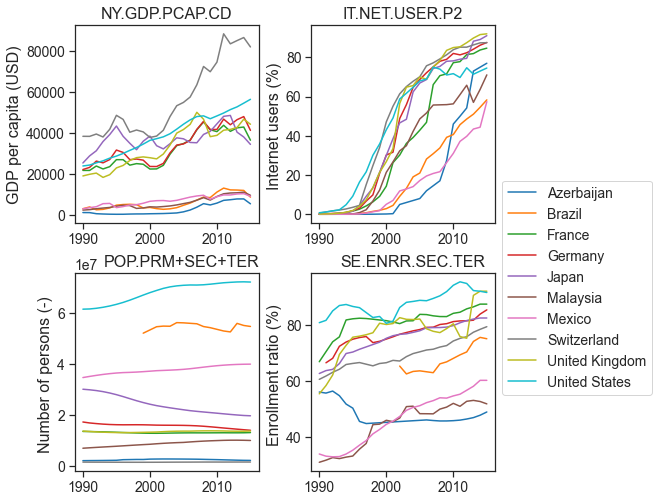

In [29]:
# Compute graphics for TopCounrtry #

n = int(10) # ex 10 for top 10

fig2 = plt.figure(figsize= (7,7))
x = np.linspace(1990, 2015, 26)

TopCountry = np.array(Output_Country_Score.iloc[0:(n),0].index)

df_TopCountry =df_indicCod[df_indicCod['Country Code'].isin(TopCountry)]


y_labls = ['GDP per capita (USD)', 'Internet users (%) ', 'Number of persons (-) ', 'Enrollment ratio (%) ']

df_TopCountry2 = df_TopCountry[df_TopCountry['Indicator Code'] == 'NY.GDP.PCAP.CD']
df_TopCountry3 = df_TopCountry2.drop(df_TopCountry2.iloc[:,1:4], 1)
df_TopCountry3.set_index(['Country Name'], inplace=True)
df_TopCountry4 = df_TopCountry3.T
df_TopCountry4.drop(labels ='mean',  axis = 0, inplace = True)
df_TopCountry4 = df_TopCountry4.interpolate(method='linear', axis=0)
df_TopCountry4   

plt.rc('axes', prop_cycle=(cycler('color', ColorsPalette)))
plt.subplot(2,2, 1)
plt.plot(x, df_TopCountry4)    
plt.ylabel(y_labls[0], fontsize = 16)
plt.title('NY.GDP.PCAP.CD',  fontsize = 16 )

df_TopCountry2 = df_TopCountry[df_TopCountry['Indicator Code'] ==  'IT.NET.USER.P2']
df_TopCountry3 = df_TopCountry2.drop(df_TopCountry2.iloc[:,1:4], 1)
df_TopCountry3.set_index(['Country Name'], inplace=True)
df_TopCountry4 = df_TopCountry3.T
df_TopCountry4.drop(labels ='mean',  axis = 0, inplace = True)
df_TopCountry4 = df_TopCountry4.interpolate(method='linear', axis=0)
df_TopCountry4      
        
plt.rc('axes', prop_cycle=(cycler('color', ColorsPalette)))
plt.subplot(2,2, 2)
plt.plot(x, df_TopCountry4)    
plt.ylabel(y_labls[1], fontsize = 16)
plt.title('IT.NET.USER.P2',  fontsize = 16 )

buff = ['SP.SEC.TOTL.IN',  'SP.PRM.TOTL.IN',  'SP.TER.TOTL.IN']

for i in range(len(buff)):
    df_TopCountry2 = df_TopCountry[df_TopCountry['Indicator Code'] == (buff[i])]
    df_TopCountry3 = df_TopCountry2.drop(df_TopCountry2.iloc[:,1:4], 1)
    df_TopCountry3.set_index(['Country Name'], inplace=True)
    df_TopCountry4 = df_TopCountry3.T
    df_TopCountry4.drop(labels ='mean',  axis = 0, inplace = True)
    df_TopCountry4 = df_TopCountry4.interpolate(method='linear', axis=0)
    
    if i == 0:
        df_TopCountry5 = df_TopCountry4.copy()
    else:
        df_TopCountry5 += df_TopCountry4
    
plt.rc('axes', prop_cycle=(cycler('color', ColorsPalette)))
plt.subplot(2,2,3)
plt.plot(x, df_TopCountry5)    
plt.ylabel(y_labls[2], fontsize = 16)
plt.title('POP.PRM+SEC+TER',  x = .58, fontsize = 16) 


buff2 = ['SE.SEC.ENRR', 'SE.TER.ENRR']

for i in range(len(buff2)):
    df_TopCountry2 = df_TopCountry[df_TopCountry['Indicator Code'] == (buff2[i])]
    df_TopCountry3 = df_TopCountry2.drop(df_TopCountry2.iloc[:,1:4], 1)
    df_TopCountry3.set_index(['Country Name'], inplace=True)
    df_TopCountry4 = df_TopCountry3.T
    df_TopCountry4.drop(labels ='mean',  axis = 0, inplace = True)
    df_TopCountry4 = df_TopCountry4.interpolate(method='linear', axis=0)
    
    if i == 0:
        df_TopCountry5b = df_TopCountry4.copy()
    else:
        df_TopCountry5b += df_TopCountry4
        
df_TopCountry6 =  df_TopCountry5b/2    
          
plt.subplot(2,2, 4)
plt.plot(x, df_TopCountry6) 
plt.ylabel(y_labls[3], fontsize = 16)
plt.title('SE.ENRR.SEC.TER', x = .55, fontsize = 16)
    
fig2.tight_layout(pad=0.8)
plt.legend(df_TopCountry4.columns, bbox_to_anchor = (1, 1.5), fontsize = 14)
plt.show()

In [30]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations = Output_Country_Score.index,
    z = (Output_Country_Score['TOTAL']),
    zmin =50, 
    zmid = 69,
    zmax = 73,
    text = Output_Country_Score.index,
    colorscale = 'viridis',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.8,
#     colorbar_tickprefix = '$',
    colorbar_title = 'Score (%)',
))

fig.update_layout(
    title_text='Potentially interesting countries for "academy" international expansion', 
        geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular')
)

fig.show()

In [31]:
df_Top25 = Output_Country_Score.iloc[0:24, :]
df_Top25.sort_values(by='STD', ascending=True, inplace = True)

C:\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
df_Top25

NY.GDP.PCAP.CD  IT.NET.USER.P2  POP.PRM+SEC+TER  \
Country Code                                                    
MYS                       65              79               78   
AZE                       54              66               54   
ZAF                       58              47               89   
MEX                       65              55               95   
SAU                       78              68               76   
CHN                       52              54               99   
BRA                       66              64               96   
TUR                       68              61               91   
ITA                       86              72               80   
VNM                       26              51               92   
RUS                       69              69               93   
QAT                       97              82               20   
JPN                       87              92               90   
GBR                       89              95               86   
FRA                       88              89               84   
DEU                       88              92               87   
CHE                       97              94               41   
KOR                       80              95               81   
USA                       92              88               98   
SWE                       94              98               47   
NLD                       93              97               58   
LUX                       99              97               11   
CAN                       90              93               71   
BMU                       98              96                1   

              SE.ENRR.SEC.TER  TOTAL  STD  
Country Code                               
MYS                        63     71    7  
AZE                        89     65   14  
ZAF                        57     62   15  
MEX                        57     68   16  
SAU                        37     64   16  
CHN                        56     65   19  
BRA                        38     66   20  
TUR                        32     63   21  
ITA                        22     65   25  
VNM                        85     63   26  
RUS                        20     62   26  
QAT                        62     65   28  
JPN                        25     73   28  
GBR                        24     73   28  
FRA                        19     70   29  
DEU                        20     71   29  
CHE                        33     66   29  
KOR                         6     65   34  
USA                        11     72   35  
SWE                        12     62   35  
NLD                         7     63   36  
LUX                        55     65   36  
CAN                         1     63   37  
BMU                        60     63   39

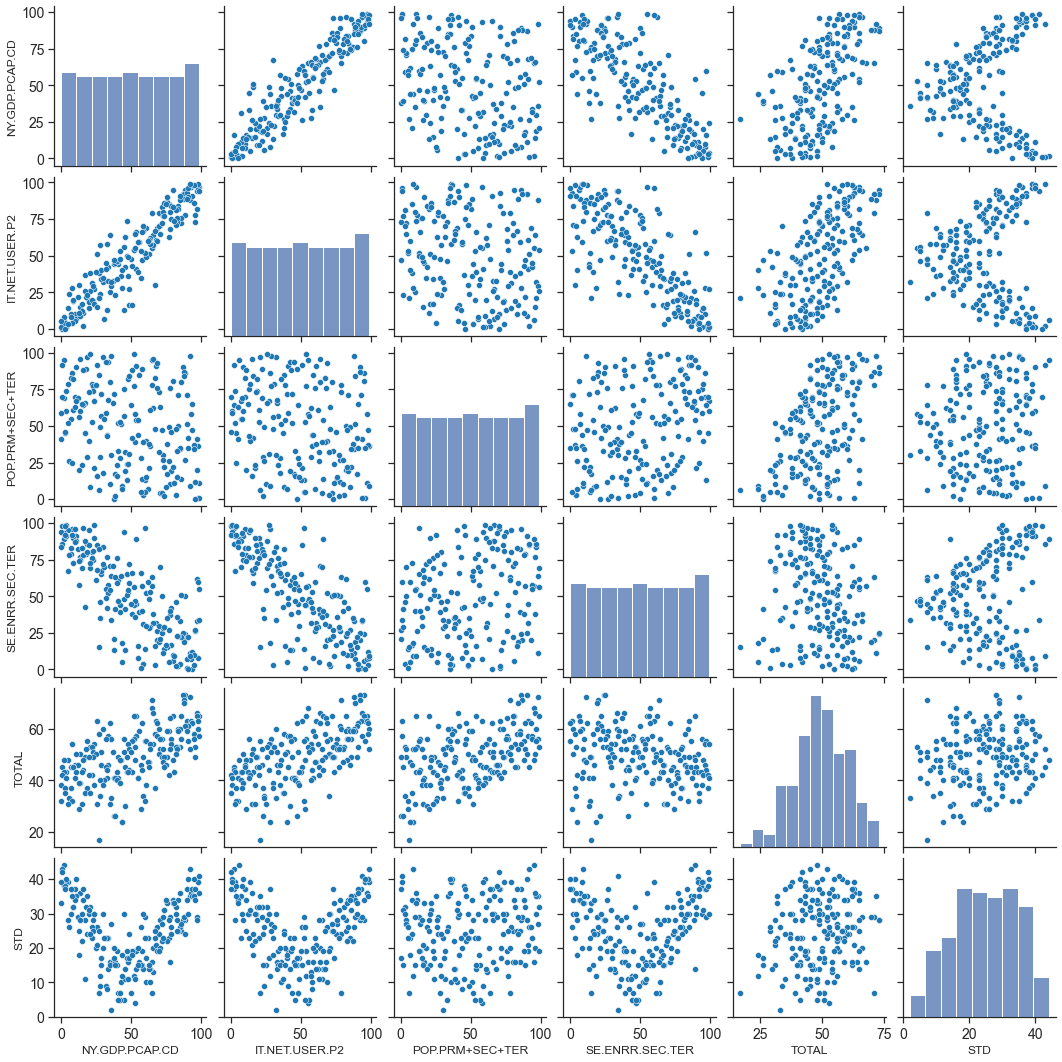

In [33]:
sns.pairplot(Output_Country_Score)

In [34]:
Output_Country_Score[(Output_Country_Score['TOTAL']>60) & (Output_Country_Score['STD'] < 20)]

NY.GDP.PCAP.CD  IT.NET.USER.P2  POP.PRM+SEC+TER  \
Country Code                                                    
MYS                       65              79               78   
MEX                       65              55               95   
AZE                       54              66               54   
CHN                       52              54               99   
SAU                       78              68               76   
ZAF                       58              47               89   
MAR                       35              64               80   

              SE.ENRR.SEC.TER  TOTAL  STD  
Country Code                               
MYS                        63     71    7  
MEX                        57     68   16  
AZE                        89     65   14  
CHN                        56     65   19  
SAU                        37     64   16  
ZAF                        57     62   15  
MAR                        71     62   16